In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score,f1_score
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import Precision, Recall

In [3]:
SEED=42

In [4]:
data=pd.read_csv('/kaggle/input/water-potability-dataset-with-10-parameteres/water_potability.csv')

In [5]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
data.shape

(3276, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
data=data.fillna(data.median())

In [11]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [12]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


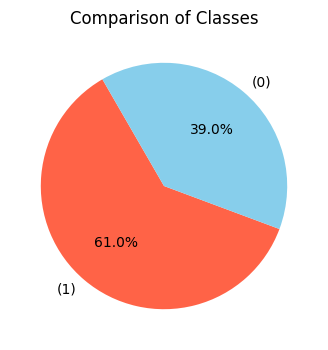

In [13]:
classes=data['Potability'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(classes,labels=['(1)','(0)'],autopct='%1.1f%%',startangle=120,colors=['tomato','skyblue'])
plt.title('Comparison of Classes')
plt.show()

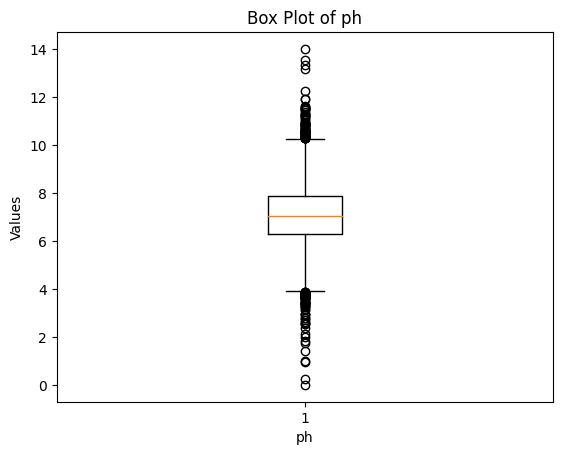

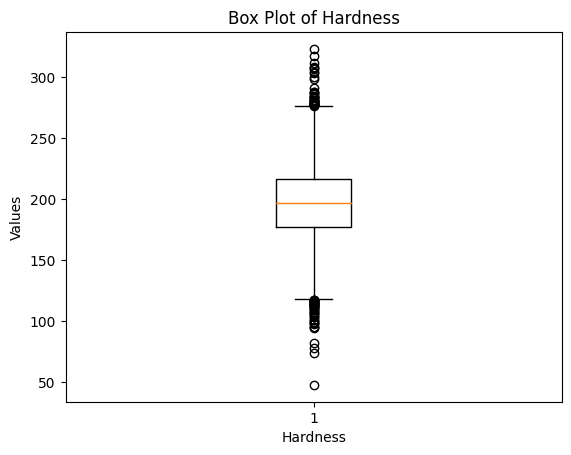

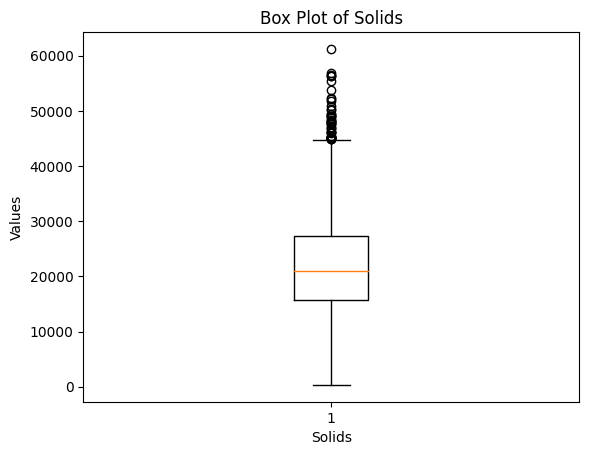

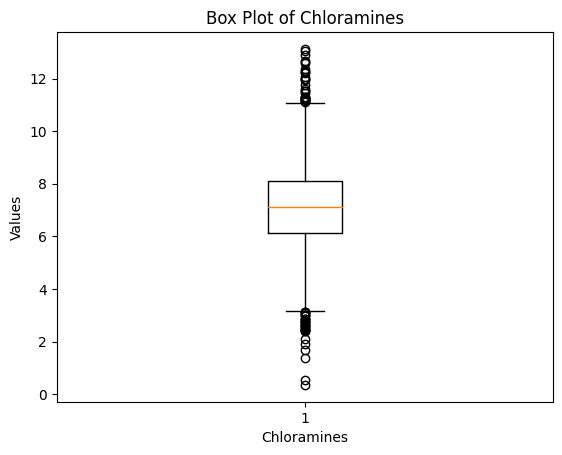

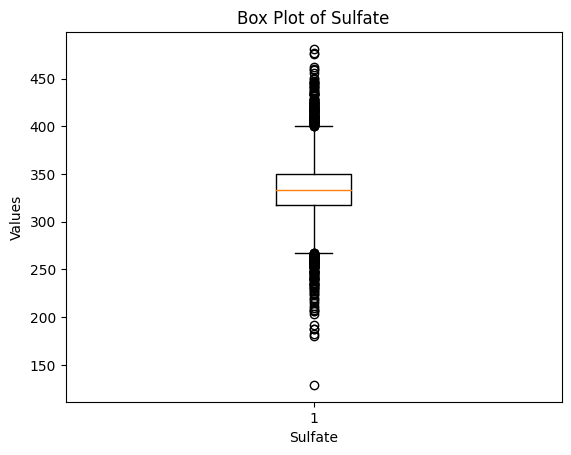

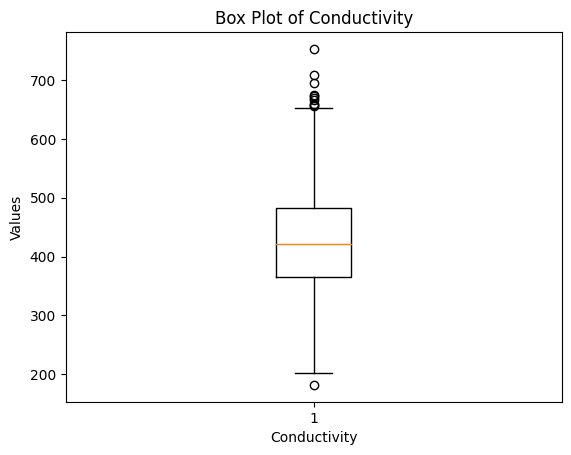

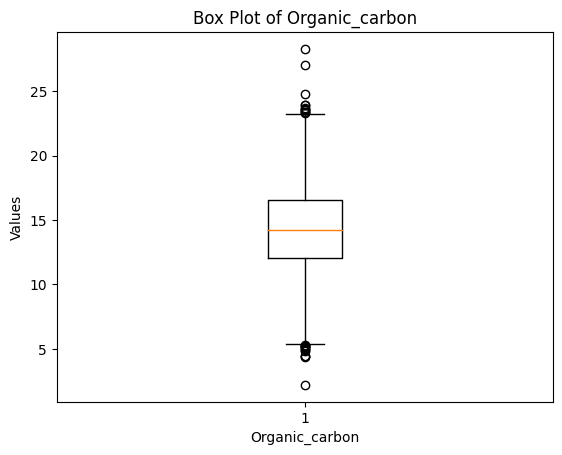

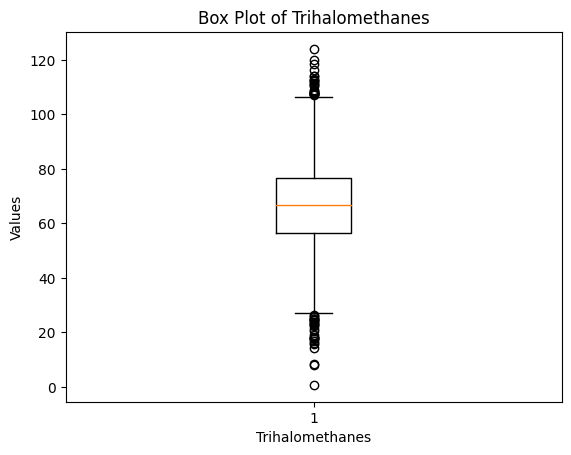

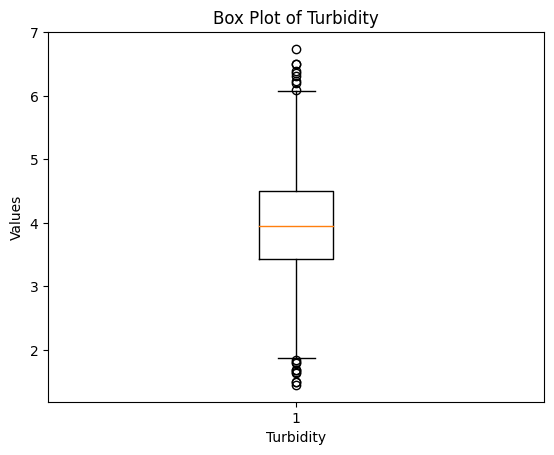

In [14]:
for column in data.columns:
    if column != 'Potability':
        plt.figure()
        plt.boxplot(data[column])
        plt.xlabel(f'{column}')
        plt.ylabel('Values')
        plt.title(f'Box Plot of {column}')
        plt.show()

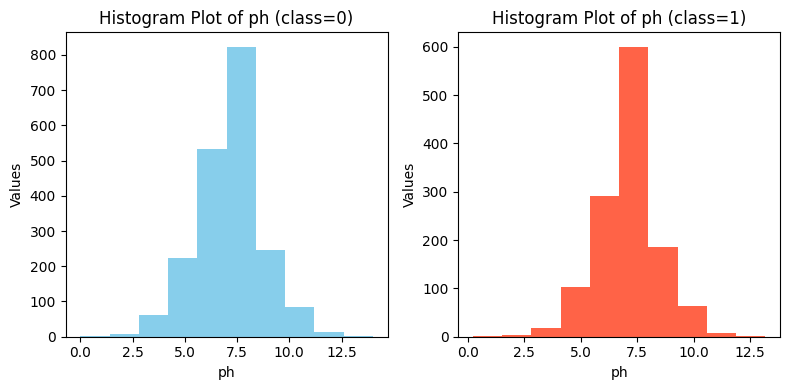

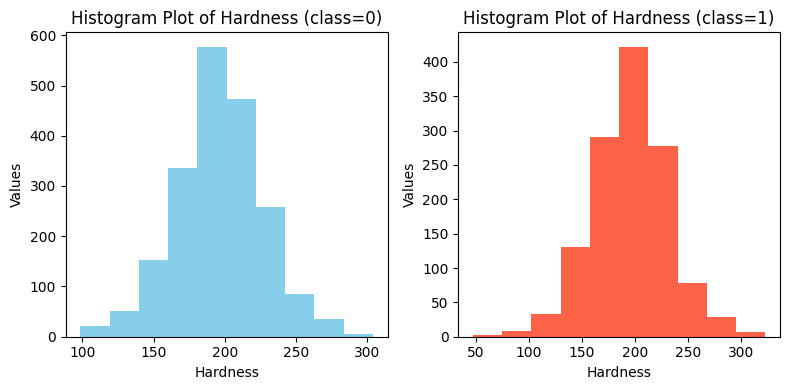

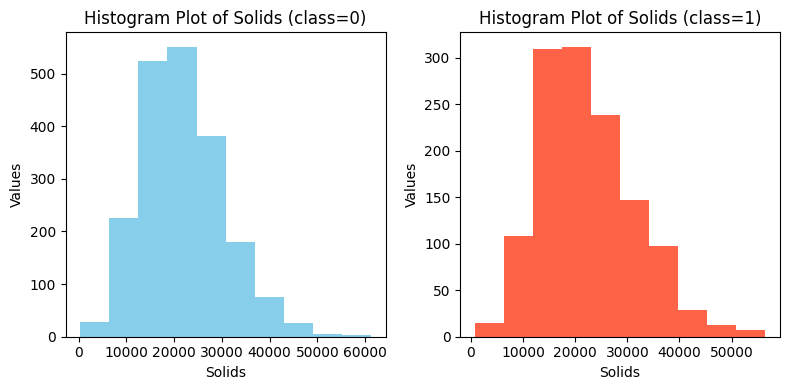

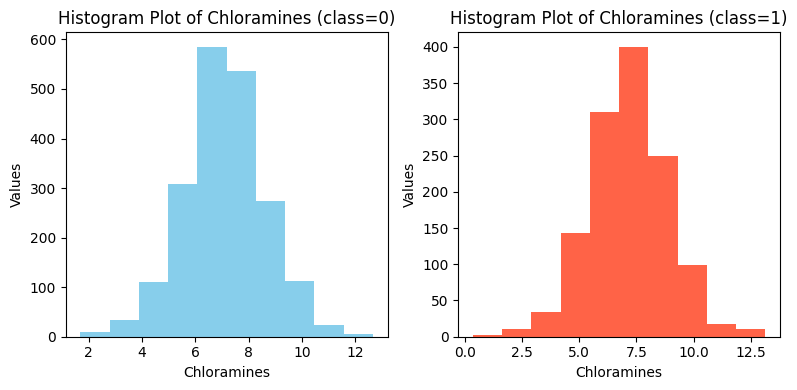

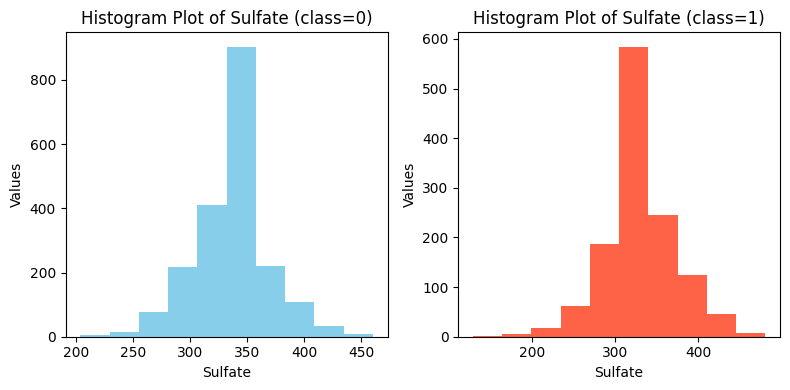

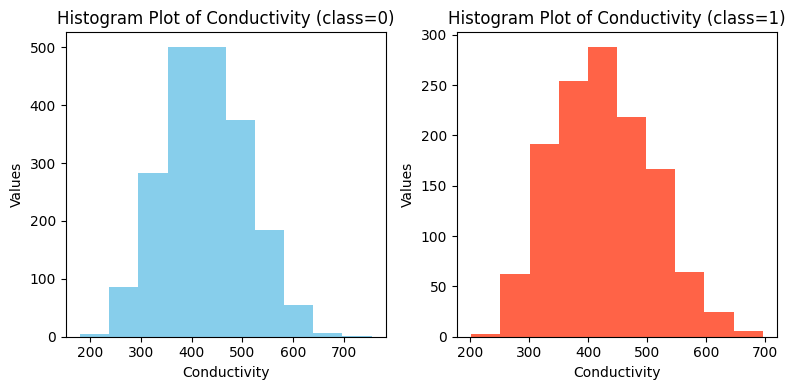

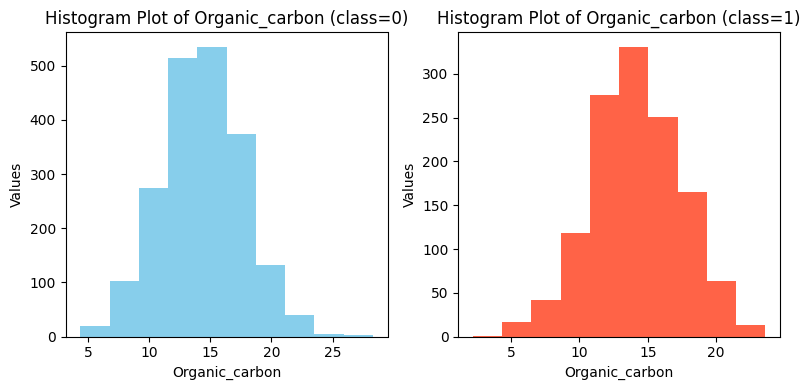

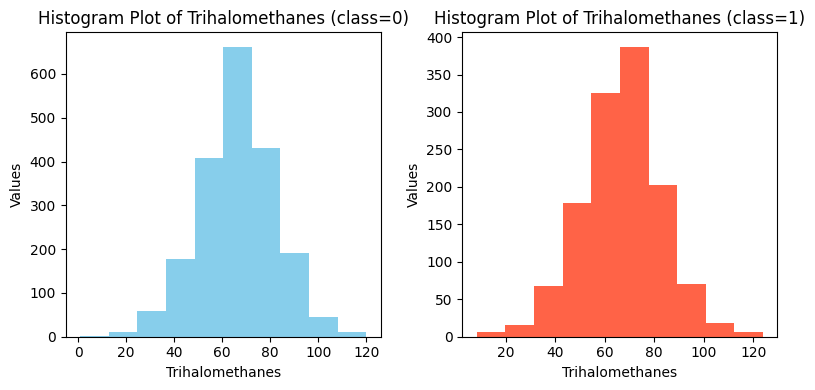

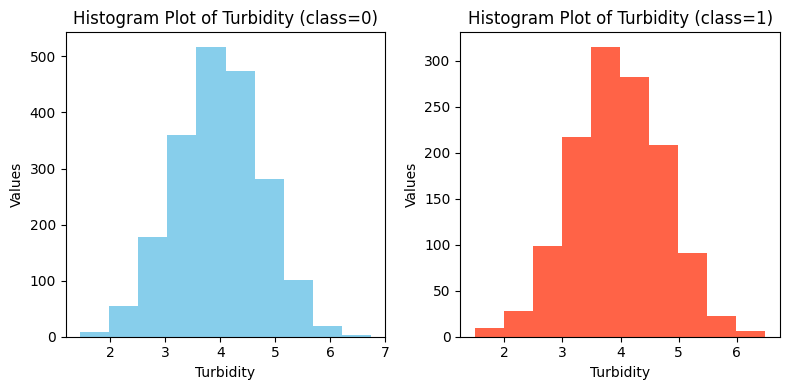

In [15]:
for column in data.columns:
    if column != 'Potability':
        plt.figure(figsize=(8,4))
        plt.subplot(1,2,1)
        plt.hist(data[data['Potability']==0][column],color='skyblue')
        plt.xlabel(f'{column}')
        plt.ylabel('Values')
        plt.title(f'Histogram Plot of {column} (class=0)')
        plt.subplot(1,2,2)
        plt.hist(data[data['Potability']==1][column],color='tomato')
        plt.xlabel(f'{column}')
        plt.ylabel('Values')
        plt.title(f'Histogram Plot of {column} (class=1)')
        plt.tight_layout()
        plt.show()

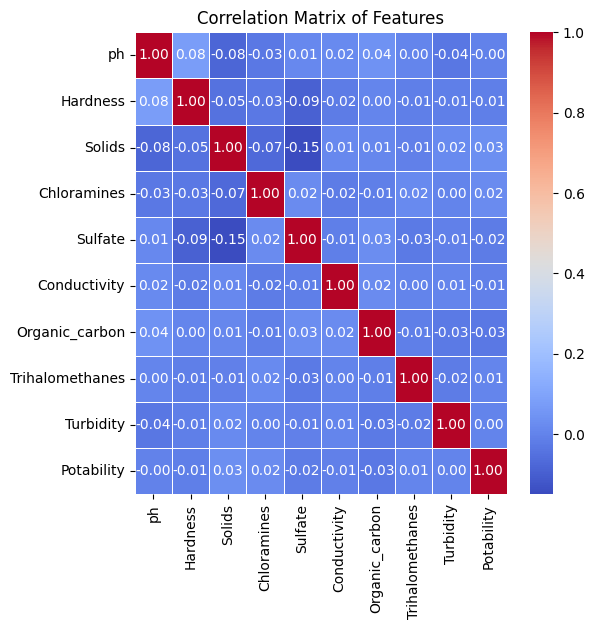

In [16]:
corr_matrix=data.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.4)
plt.title('Correlation Matrix of Features')
plt.show()


In [18]:
over_sampler=RandomOverSampler(sampling_strategy=0.8)
x=data.drop('Potability',axis=1).values
y=data['Potability'].values
x,y=over_sampler.fit_resample(x,y)

In [19]:
from joblib import dump
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(x)
dump(scaler, '/kaggle/working/scaler.joblib')

['/kaggle/working/scaler.joblib']

In [22]:
parameters = {
    'LogisticRegression': {
        'C': [0.1, 1,5, 10,50,100],
        'penalty': ['l1', 'l2']
    },
    'SVC': {
        'C': [0.1,1,2,5,10,15,25],
        'kernel': ['linear', 'rbf','poly']
    },
    'DecisionTreeClassifier': {
        'max_depth': [None, 10, 20,30,40,50,60,70,80,90,100,150,200,210,250,300,350,400]
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100,150, 170,200,230,250,300]
    },
    'GradientBoostingClassifier': {
        'n_estimators': [50, 100,150, 200,250,300,400,500,550],
        'learning_rate': [0.01, 0.1, 0.5,1]
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100,150, 200,250,300,350,400],
        'learning_rate': [0.01, 0.1, 0.5,1,2]
    },
    'BernoulliNB': {
        'alpha': [0.01,0.1,1,5,10,15]
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3,5,7,10,15,20,30],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    
    'XGBClassifier': {
        'learning_rate': [0.001,0.01, 0.1, 0.5,1],
        'n_estimators': [50, 100,150, 200,250,350,300,350]
    }
}

In [23]:
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BernoulliNB': BernoulliNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'XGBClassifier': XGBClassifier()
}

In [24]:
results =list()
for model_name, model in models.items():
    print(f"Grid searching for {model_name}")
    param_grid = parameters[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=4, scoring='accuracy')
    grid_search.fit(x,y)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_
    
    results.append({'Model': model_name, 'Best Params': best_params, 'Best Accuracy': best_accuracy})
results_df = pd.DataFrame(results)

Grid searching for LogisticRegression


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Grid searching for SVC
Grid searching for DecisionTreeClassifier
Grid searching for RandomForestClassifier
Grid searching for GradientBoostingClassifier
Grid searching for AdaBoostClassifier
Grid searching for BernoulliNB
Grid searching for KNeighborsClassifier
Grid searching for XGBClassifier


In [25]:
results_df.head(9)

,Model,Best Params,Best Accuracy
0,LogisticRegression,"{'C': 0.1, 'penalty': 'l2'}",0.559789
1,SVC,"{'C': 25, 'kernel': 'rbf'}",0.625139
2,DecisionTreeClassifier,{'max_depth': 200},0.625417
3,RandomForestClassifier,{'n_estimators': 170},0.685484
4,GradientBoostingClassifier,"{'learning_rate': 0.5, 'n_estimators': 400}",0.641268
5,AdaBoostClassifier,"{'learning_rate': 0.1, 'n_estimators': 100}",0.576196
6,BernoulliNB,{'alpha': 0.01},0.564794
7,KNeighborsClassifier,"{'metric': 'euclidean', 'n_neighbors': 30, 'we...",0.692714
8,XGBClassifier,"{'learning_rate': 0.1, 'n_estimators': 250}",0.656285


In [26]:
results_df.iloc[7,1]

{'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'distance'}

In [28]:
models = {
    'LogisticRegression': LogisticRegression(C=0.1,penalty='l2'),
    'SVC': SVC(C=15,kernel='rbf'),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=50),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=150),
    'GradientBoostingClassifier': GradientBoostingClassifier(learning_rate=1,n_estimators=550),
    'AdaBoostClassifier': AdaBoostClassifier(learning_rate=0.01,n_estimators=400),
    'BernoulliNB': BernoulliNB(alpha=15),
    'KNeighborsClassifier': KNeighborsClassifier(metric='euclidean',n_neighbors=30,weights='distance'),
    'XGBClassifier': XGBClassifier(learning_rate=0.1,n_estimators=250)
}
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}
scores = []
for model_name, model in models.items():
    print("-" * 50)
    print(f'{model_name}:')
    
    # Perform cross-validation
    cv_results = cross_validate(model,x,y,cv=4, scoring=scoring)
    
    # Collect the results
    model_results = {
        'Model': model_name,
        'Accuracy': np.mean(cv_results['test_accuracy']),
        'Precision': np.mean(cv_results['test_precision']),
        'Recall': np.mean(cv_results['test_recall']),
        'F1': np.mean(cv_results['test_f1'])
    }
    scores.append(model_results)

# Create DataFrame from results
scores_df = pd.DataFrame(scores)

--------------------------------------------------
LogisticRegression:
--------------------------------------------------
SVC:
--------------------------------------------------
DecisionTreeClassifier:
--------------------------------------------------
RandomForestClassifier:
--------------------------------------------------
GradientBoostingClassifier:
--------------------------------------------------
AdaBoostClassifier:
--------------------------------------------------
BernoulliNB:
--------------------------------------------------
KNeighborsClassifier:
--------------------------------------------------
XGBClassifier:


In [29]:
scores_df.head(9)

,Model,Accuracy,Precision,Recall,F1
0,LogisticRegression,0.559789,0.619160,0.025013,0.047246
1,SVC,0.623749,0.586080,0.521834,0.551508
2,DecisionTreeClassifier,0.619299,0.557802,0.641947,0.594633
3,RandomForestClassifier,0.677697,0.648564,0.578076,0.604250
4,GradientBoostingClassifier,0.632091,0.572559,0.640672,0.601509
5,AdaBoostClassifier,0.573693,0.683553,0.145133,0.226016
6,BernoulliNB,0.564238,0.545053,0.182732,0.271682
7,KNeighborsClassifier,0.692714,0.673453,0.572472,0.615676
8,XGBClassifier,0.656285,0.607473,0.606892,0.604686


In [69]:
# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='model_checkpoint.weights.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
# Define the input layer
input_layer = Input(shape=(9,))
layer_1=Dense(64,activation='relu')(input_layer)
layer_2=Dense(64,activation='relu')(layer_1)
layer_3=Dense(64,activation='relu')(layer_2)
layer_4=Dropout(0.2)(layer_3)
layer_5=Dense(16,activation='relu')(layer_4)
output_layer=Dense(1,activation='sigmoid')(layer_5)
model=Model(inputs=input_layer,outputs=output_layer)
model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy',Precision(),Recall()])
history=model.fit(x,y,validation_split=0.2,epochs=200,batch_size=64,verbose=1,
                                        callbacks=[checkpoint_callback])


Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.5894 - loss: 0.6807 - precision_10: 0.3715 - recall_10: 0.0854 - val_accuracy: 0.3347 - val_loss: 0.7939 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6193 - loss: 0.6605 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00 - val_accuracy: 0.3347 - val_loss: 0.7703 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6217 - loss: 0.6585 - precision_10: 0.6304 - recall_10: 0.0036 - val_accuracy: 0.3597 - val_loss: 0.7631 - val_precision_10: 0.9091 - val_recall_10: 0.0418
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6498 - loss: 0.6380 - precision_10: 0.7430 - recall_10: 0.0516 - val_accuracy: 0.4431 - val_loss: 0.7225 - val_precision_10: 0.8305 - val_recall_10: 0.2046
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6614 - loss: 0.6251 - prec

In [70]:
input_layer = Input(shape=(9,))
layer_1 = Dense(64, activation='relu')(input_layer)
layer_2 = Dense(64, activation='relu')(layer_1)
layer_3 = Dense(64, activation='relu')(layer_2)
layer_4 = Dropout(0.2)(layer_3)
layer_5 = Dense(16, activation='relu')(layer_4)
output_layer = Dense(1, activation='sigmoid')(layer_5)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Load the weights
model.load_weights('model_checkpoint.weights.h5')

In [71]:
model.save('/kaggle/working/my_model.h5')

In [72]:
model.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,017 (39.13 KB)

 Trainable params: 10,017 (39.13 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [87]:
model.evaluate(x_test,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9541 - loss: 0.2531 - precision_11: 0.9735 - recall_11: 0.9228 


[0.24627166986465454,
 0.9472222328186035,
 0.9737704992294312,
 0.9082568883895874]

In [89]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'precision_10', 'recall_10', 'val_accuracy', 'val_loss', 'val_precision_10', 'val_recall_10'])


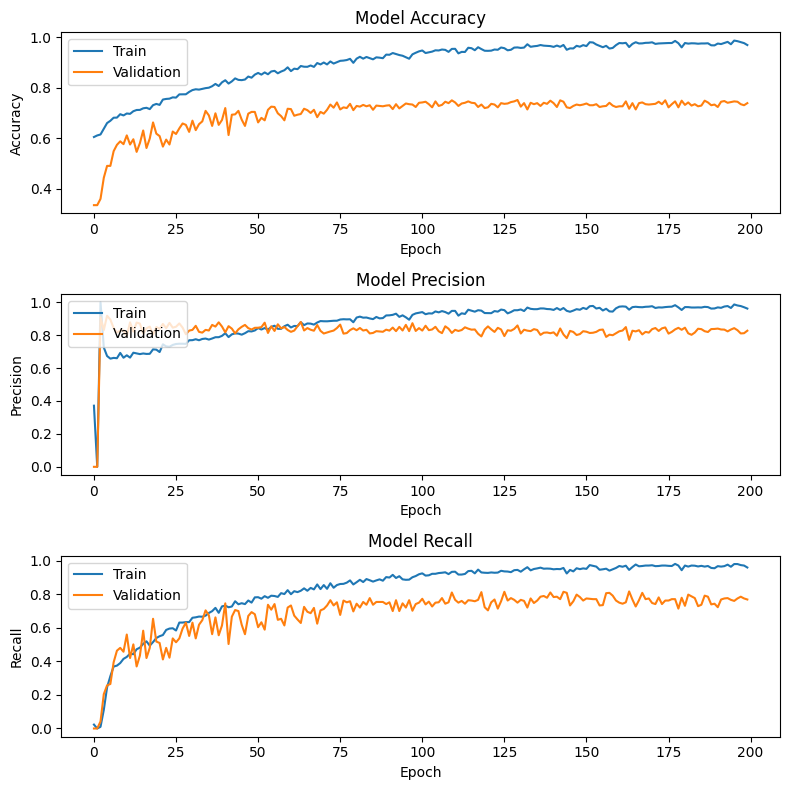

In [90]:
plt.figure(figsize=(8, 8))

# Plot accuracy
plt.subplot(3, 1, 1)  
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot precision
plt.subplot(3, 1, 2)  
plt.plot(history.history['precision_10'])  # Updated key for precision
plt.plot(history.history['val_precision_10'])  # Updated key for validation precision
plt.title('Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot recall
plt.subplot(3, 1, 3)  
plt.plot(history.history['recall_10'])  # Updated key for recall
plt.plot(history.history['val_recall_10'])  # Updated key for validation recall
plt.title('Model Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend(['Train', 'Validation'], loc='upper left')

# Adjust layout and display
plt.tight_layout()  
plt.show()


In [92]:
def water_quality_predictor(arr):
    prediction=model.predict(arr.reshape(1,9))
    if prediction == 0:
        return 'Not Potable Water'
    else:
        return 'Potable Water'

In [94]:
print(x_test[0])

[ 0.10649988 -0.12276291 -0.53976204 -0.2309495   0.15940785 -0.16062653
 -0.59414482  0.08527797 -0.01934779]


In [93]:
print(water_quality_predictor(x_test[0]))
print(y_test[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
Potable Water
1


In [97]:
from tensorflow.keras.models import load_model
import numpy as np

# Assuming you already have MinMaxScaler fitted during training
# scaler = MinMaxScaler((-1, 1)) -> Use the same scaler

# Load the saved model
saved_model = load_model('/kaggle/working/my_model.h5')

# Example new data (replace this with actual data you want to predict)
new_data = np.array([7.063646976	,140.6128657	,17941.81126	,6.2753046	,376.0461562	,402.593602,	12.43973968	,29.46842812	,3.39586624])

# Normalize the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data.reshape(1, -1))

# Make a prediction
prediction = saved_model.predict(new_data_scaled)
print(prediction)
# Interpret the prediction
if prediction < 0.5:
    print('Not Potable Water')
else:
    print('Potable Water')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
[[0.99925834]]
Potable Water


In [ ]:
model.save('/kaggle/working/my_.h5')